<ipython-input-1-893193b11b38>:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, delim_whitespace=True, header=None, names=columns)


📌 Linear Regression - R² Score: 0.8524, RMSE: 3.21
📌 Ridge Regression - R² Score: 0.8230, RMSE: 3.52
📌 Lasso Regression - R² Score: 0.8207, RMSE: 3.54

🚀 Best Model: Linear Regression with R² = 0.8524


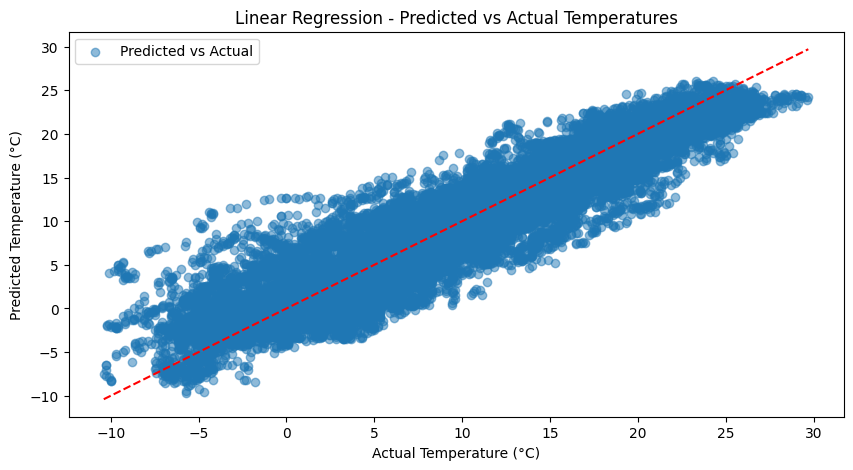

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset with all relevant features
url = 'https://gist.githubusercontent.com/Prof-Watson/dedfbf237d013900fa5c4b54c5fd939a/raw/537b2085eca3dc0c62ce526f30977005456e9026/yosemite_data.txt'
columns = ["WBANNO", "UTC_DATE", "UTC_TIME", "LST_DATE", "LST_TIME", "CRX_VN",
           "LONGITUDE", "LATITUDE", "AIR_TEMPERATURE", "PRECIPITATION",
           "SOLAR_RADIATION", "SR_FLAG", "SURFACE_TEMPERATURE", "ST_TYPE",
           "ST_FLAG", "RELATIVE_HUMIDITY", "RH_FLAG", "SOIL_MOISTURE_5",
           "SOIL_TEMPERATURE_5", "WETNESS", "WET_FLAG", "WIND_1_5", "WIND_FLAG"]

# Read data (space-separated)
df = pd.read_csv(url, delim_whitespace=True, header=None, names=columns)

# Filter valid air temperature values
df = df[df["AIR_TEMPERATURE"] > -1000]

# Convert UTC_TIME to minutes since midnight
df["TIME"] = (df["UTC_TIME"] // 100) * 60 + (df["UTC_TIME"] % 100)

# Extract date-based features
df["DATE"] = pd.to_datetime(df["LST_DATE"], format='%Y%m%d')
df["MONTH"] = df["DATE"].dt.month
df["SEASON"] = df["MONTH"] % 12 // 3 + 1  # 1: Winter, 2: Spring, 3: Summer, 4: Fall

# Encode time of day as cyclical features
df["SIN_TIME"] = np.sin(2 * np.pi * df["TIME"] / 1440)
df["COS_TIME"] = np.cos(2 * np.pi * df["TIME"] / 1440)

# Define Features & Target
features = ["SIN_TIME", "COS_TIME", "MONTH", "SEASON", "TIME", "LONGITUDE", "LATITUDE",
            "PRECIPITATION", "SOLAR_RADIATION", "SURFACE_TEMPERATURE", "RELATIVE_HUMIDITY",
            "SOIL_MOISTURE_5", "SOIL_TEMPERATURE_5", "WIND_1_5"]
target = "AIR_TEMPERATURE"

X = df[features]
y = df[target]

# One-hot encode categorical features (MONTH, SEASON)
preprocessor = ColumnTransformer([
    ("scale", StandardScaler(), ["SIN_TIME", "COS_TIME", "TIME", "LONGITUDE", "LATITUDE",
                                 "PRECIPITATION", "SOLAR_RADIATION", "SURFACE_TEMPERATURE",
                                 "RELATIVE_HUMIDITY", "SOIL_MOISTURE_5", "SOIL_TEMPERATURE_5", "WIND_1_5"]),
    ("onehot", OneHotEncoder(drop="first"), ["MONTH", "SEASON"])
])

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01)
}

# Fit models and evaluate performance
results = {}
for name, model in models.items():
    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results[name] = {"R²": r2, "RMSE": rmse}

    print(f"📌 {name} - R² Score: {r2:.4f}, RMSE: {rmse:.2f}")

# Plot predictions of the best model
best_model_name = max(results, key=lambda k: results[k]["R²"])
print(f"\n🚀 Best Model: {best_model_name} with R² = {results[best_model_name]['R²']:.4f}")

# Refit best model for visualization
best_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", models[best_model_name])
])
best_pipeline.fit(X_train, y_train)
y_pred_best = best_pipeline.predict(X_test)

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_best, alpha=0.5, label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle="--")
plt.xlabel("Actual Temperature (°C)")
plt.ylabel("Predicted Temperature (°C)")
plt.title(f"{best_model_name} - Predicted vs Actual Temperatures")
plt.legend()
plt.show()


## Using Feature Engineering - Interaction terms, wind effects, humidity-temperature interactions.

<ipython-input-3-31bc13fa4704>:21: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, delim_whitespace=True, header=None, names=columns)


📌 Linear Regression - R² Score: 0.9904, RMSE: 0.82
📌 Ridge Regression - R² Score: 0.9889, RMSE: 0.88
📌 Lasso Regression - R² Score: 0.9857, RMSE: 1.00
📌 Gradient Boosting - R² Score: 0.9996, RMSE: 0.17

🚀 Best Model: Gradient Boosting with R² = 0.9996


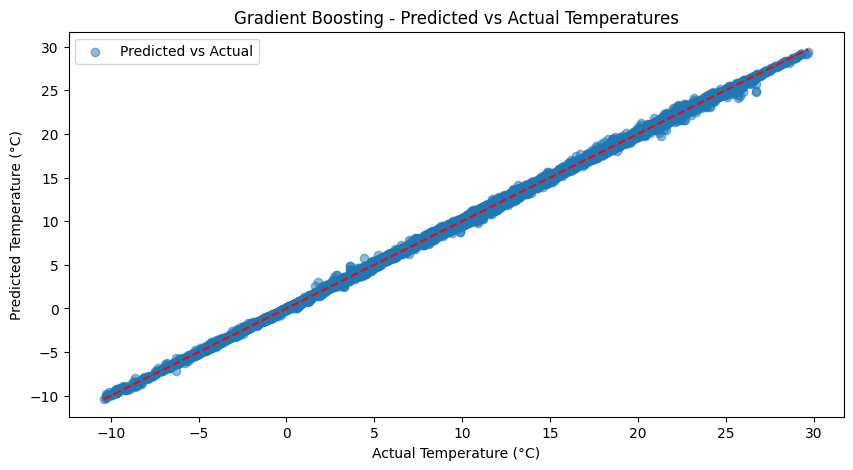

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor

# Load dataset with all relevant features
url = 'https://gist.githubusercontent.com/Prof-Watson/dedfbf237d013900fa5c4b54c5fd939a/raw/537b2085eca3dc0c62ce526f30977005456e9026/yosemite_data.txt'
columns = ["WBANNO", "UTC_DATE", "UTC_TIME", "LST_DATE", "LST_TIME", "CRX_VN",
           "LONGITUDE", "LATITUDE", "AIR_TEMPERATURE", "PRECIPITATION",
           "SOLAR_RADIATION", "SR_FLAG", "SURFACE_TEMPERATURE", "ST_TYPE",
           "ST_FLAG", "RELATIVE_HUMIDITY", "RH_FLAG", "SOIL_MOISTURE_5",
           "SOIL_TEMPERATURE_5", "WETNESS", "WET_FLAG", "WIND_1_5", "WIND_FLAG"]

# Read data (space-separated)
df = pd.read_csv(url, delim_whitespace=True, header=None, names=columns)

# Filter valid air temperature values
df = df[df["AIR_TEMPERATURE"] > -1000]

# Convert UTC_TIME to minutes since midnight
df["TIME"] = (df["UTC_TIME"] // 100) * 60 + (df["UTC_TIME"] % 100)

# Extract date-based features
df["DATE"] = pd.to_datetime(df["LST_DATE"], format='%Y%m%d')
df["MONTH"] = df["DATE"].dt.month
df["SEASON"] = df["MONTH"] % 12 // 3 + 1  # 1: Winter, 2: Spring, 3: Summer, 4: Fall

# Encode time of day as cyclical features
df["SIN_TIME"] = np.sin(2 * np.pi * df["TIME"] / 1440)
df["COS_TIME"] = np.cos(2 * np.pi * df["TIME"] / 1440)

# 🌟 Feature Engineering (New Features)
df["WIND_1_5_SQ"] = df["WIND_1_5"] ** 2
df["HUMIDITY_TEMP"] = df["RELATIVE_HUMIDITY"] * df["AIR_TEMPERATURE"]
df["SOIL_TEMP_MOISTURE"] = df["SOIL_TEMPERATURE_5"] * df["SOIL_MOISTURE_5"]

# Define Features & Target
features = ["SIN_TIME", "COS_TIME", "MONTH", "SEASON", "TIME", "LONGITUDE", "LATITUDE",
            "PRECIPITATION", "SOLAR_RADIATION", "SURFACE_TEMPERATURE", "RELATIVE_HUMIDITY",
            "SOIL_MOISTURE_5", "SOIL_TEMPERATURE_5", "WIND_1_5", "WIND_1_5_SQ",
            "HUMIDITY_TEMP", "SOIL_TEMP_MOISTURE"]
target = "AIR_TEMPERATURE"

X = df[features]
y = df[target]

# One-hot encode categorical features (MONTH, SEASON) & scale numerical features
preprocessor = ColumnTransformer([
    ("scale", StandardScaler(), ["SIN_TIME", "COS_TIME", "TIME", "LONGITUDE", "LATITUDE",
                                 "PRECIPITATION", "SOLAR_RADIATION", "SURFACE_TEMPERATURE",
                                 "RELATIVE_HUMIDITY", "SOIL_MOISTURE_5", "SOIL_TEMPERATURE_5",
                                 "WIND_1_5", "WIND_1_5_SQ", "HUMIDITY_TEMP", "SOIL_TEMP_MOISTURE"]),
    ("onehot", OneHotEncoder(drop="first"), ["MONTH", "SEASON"])
])

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Polynomial Features (for Nonlinearity)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(preprocessor.fit_transform(X_train))
X_test_poly = poly.transform(preprocessor.transform(X_test))

# Define Models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=0.1),  # Optimized α
    "Lasso Regression": Lasso(alpha=0.01),  # Optimized α
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, max_depth=5)
}

# Fit models and evaluate performance
results = {}
for name, model in models.items():
    if name in ["Ridge Regression", "Lasso Regression", "Linear Regression"]:
        model.fit(X_train_poly, y_train)  # Use polynomial features for linear models
        y_pred = model.predict(X_test_poly)
    else:
        model.fit(X_train, y_train)  # Gradient Boosting uses original features
        y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results[name] = {"R²": r2, "RMSE": rmse}

    print(f"📌 {name} - R² Score: {r2:.4f}, RMSE: {rmse:.2f}")

# Plot predictions of the best model
best_model_name = max(results, key=lambda k: results[k]["R²"])
print(f"\n🚀 Best Model: {best_model_name} with R² = {results[best_model_name]['R²']:.4f}")

# Refit best model for visualization
best_model = models[best_model_name]
if best_model_name in ["Ridge Regression", "Lasso Regression", "Linear Regression"]:
    best_model.fit(X_train_poly, y_train)
    y_pred_best = best_model.predict(X_test_poly)
else:
    best_model.fit(X_train, y_train)
    y_pred_best = best_model.predict(X_test)

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_best, alpha=0.5, label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle="--")
plt.xlabel("Actual Temperature (°C)")
plt.ylabel("Predicted Temperature (°C)")
plt.title(f"{best_model_name} - Predicted vs Actual Temperatures")
plt.legend()
plt.show()
